<a href="https://colab.research.google.com/github/MateusAmorim/Python/blob/master/TensorFlow2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
#df.info()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


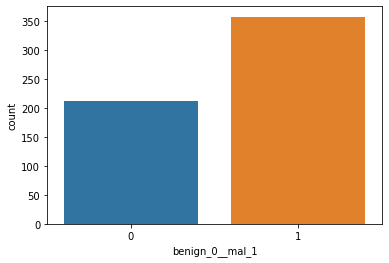

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

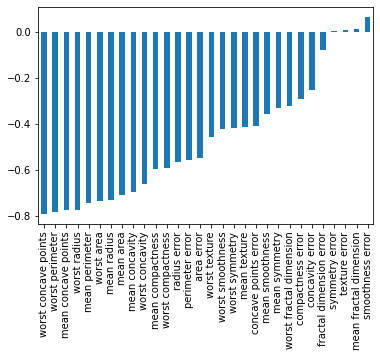

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

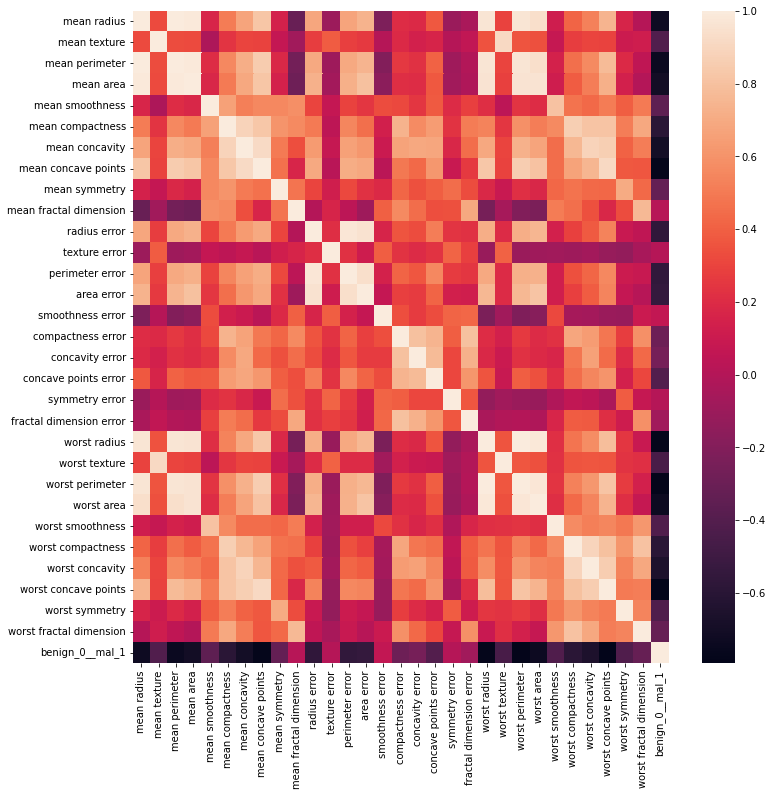

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#help(train_test_split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#CLASSIFICAÇÃO BINÁRIA
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6890 - val_loss: 0.6605
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6415 - val_loss: 0.6227
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6023 - val_loss: 0.5850
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5629 - val_loss: 0.5447
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5214 - val_loss: 0.5007
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4775 - val_loss: 0.4562
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4366 - val_loss: 0.4153
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3991 - val_loss: 0.3771
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3630 - val_loss: 0.3440
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3328 - val_loss: 0.3144
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

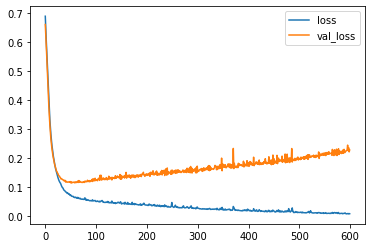

In [ ]:
losses.plot()
#ajuste excecivo

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#CLASSIFICAÇÃO BINÁRIA
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#help(EarlyStopping)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6864 - val_loss: 0.6647
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6255
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.5890
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5726 - val_loss: 0.5439
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5259 - val_loss: 0.4926
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4747 - val_loss: 0.4413
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4285 - val_loss: 0.3931
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3833 - val_loss: 0.3526
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3452 - val_loss: 0.3135
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3101 - val_loss: 0.2816
Epoch 11

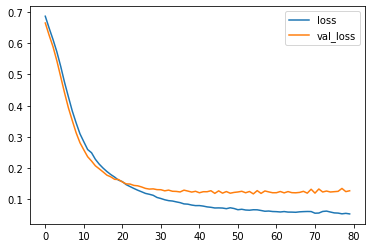

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#CLASSIFICAÇÃO BINÁRIA
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6773 - val_loss: 0.6685
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6596 - val_loss: 0.6496
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6566 - val_loss: 0.6268
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6351 - val_loss: 0.5995
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6145 - val_loss: 0.5677
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5878 - val_loss: 0.5335
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5583 - val_loss: 0.5008
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5426 - val_loss: 0.4653
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4998 - val_loss: 0.4301
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4781 - val_loss: 0.4004
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

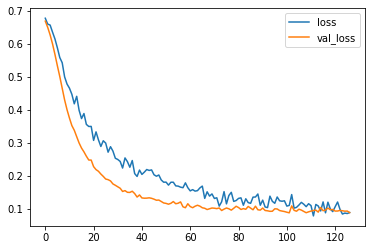

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

ValueError: ignored

In [ ]:
print(confusion_matrix(y_test,predictions))

ValueError: ignored